In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h2>Traffic Accident Analysis - USA 2016-2019</h2>
<h5> Author - Akanksha Shetty </h5>

I'm from India which has the second-largest population in the world. Mumbai specifically is known to be the city that never sleeps. Coming to the States was a huge difference for me especially because of how less crowded this place was. Back in Mumbai, I used to live in a locality called Andheri, which has one of the busiest streets. Traffic accidents were a normal thing, in fact, sometimes it gets so bad that the cops have to step in and make the public follow them overriding the traffic signals. I don't think I have experienced anything like this here especially because of this place being not-so-crowded or at least the city I live in here. However, this made me curious about the number of traffic accidents occurring across all states in the United States of America. 


For this project, I plan on analyzing the traffic accidents occurring in the USA and the factors influencing it.

The primary dataset I chose for my project can be found here 
[here](https://www.kaggle.com/sobhanmoosavi/us-accidents)
    
and this is the data for traffic accidents in the USA for the years 2016-2019. 
   

The secondary data set I chose to take can be found here https://www.census.gov/newsroom/press-releases/2019/popest-nation.html, this consists of charts of top 10 populated states in the year 2019 and percentage growth. From this dataset I wanted to obtain the actual population of the states in 2019. The dataset values can also be verified with Wikipedia as they are accurate.


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import bqplot
import matplotlib.pyplot as plt
import ipywidgets
import datetime as dt
import numpy as np
#loading the dataset
data = pd.read_csv('US_Accidents_Dec19.csv')
datastate= data.groupby('State')['ID'].count().reset_index().sort_values(by='ID')

<b>Lets understand the number of cases with a geo-map to understand the intensity. What do you see?</b>


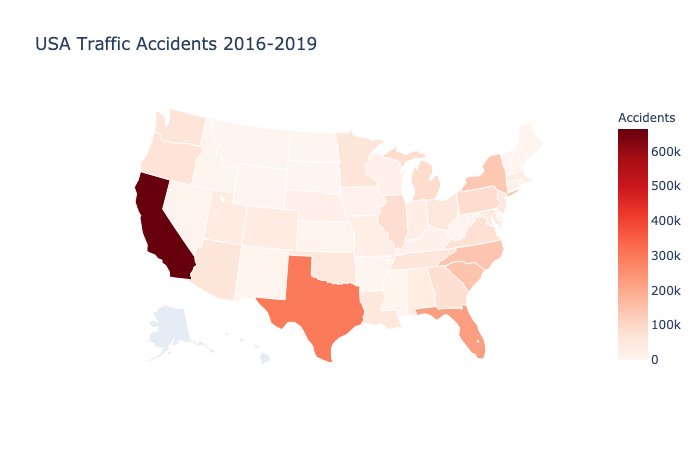

In [3]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=datastate['State'],
    z=datastate['ID'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
     # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Accidents"
))
fig.update_layout(
    title_text = 'USA Traffic Accidents 2016-2019',
    geo_scope='usa', # limite map scope to USA
)
fig.show("png")

California has the darkest shade indicating that the number of <b>traffic accidents in California is the most</b>. But let's dig deeper.
Since most of the medium to light shades are similar due to their values, a bar chart can give us more insights

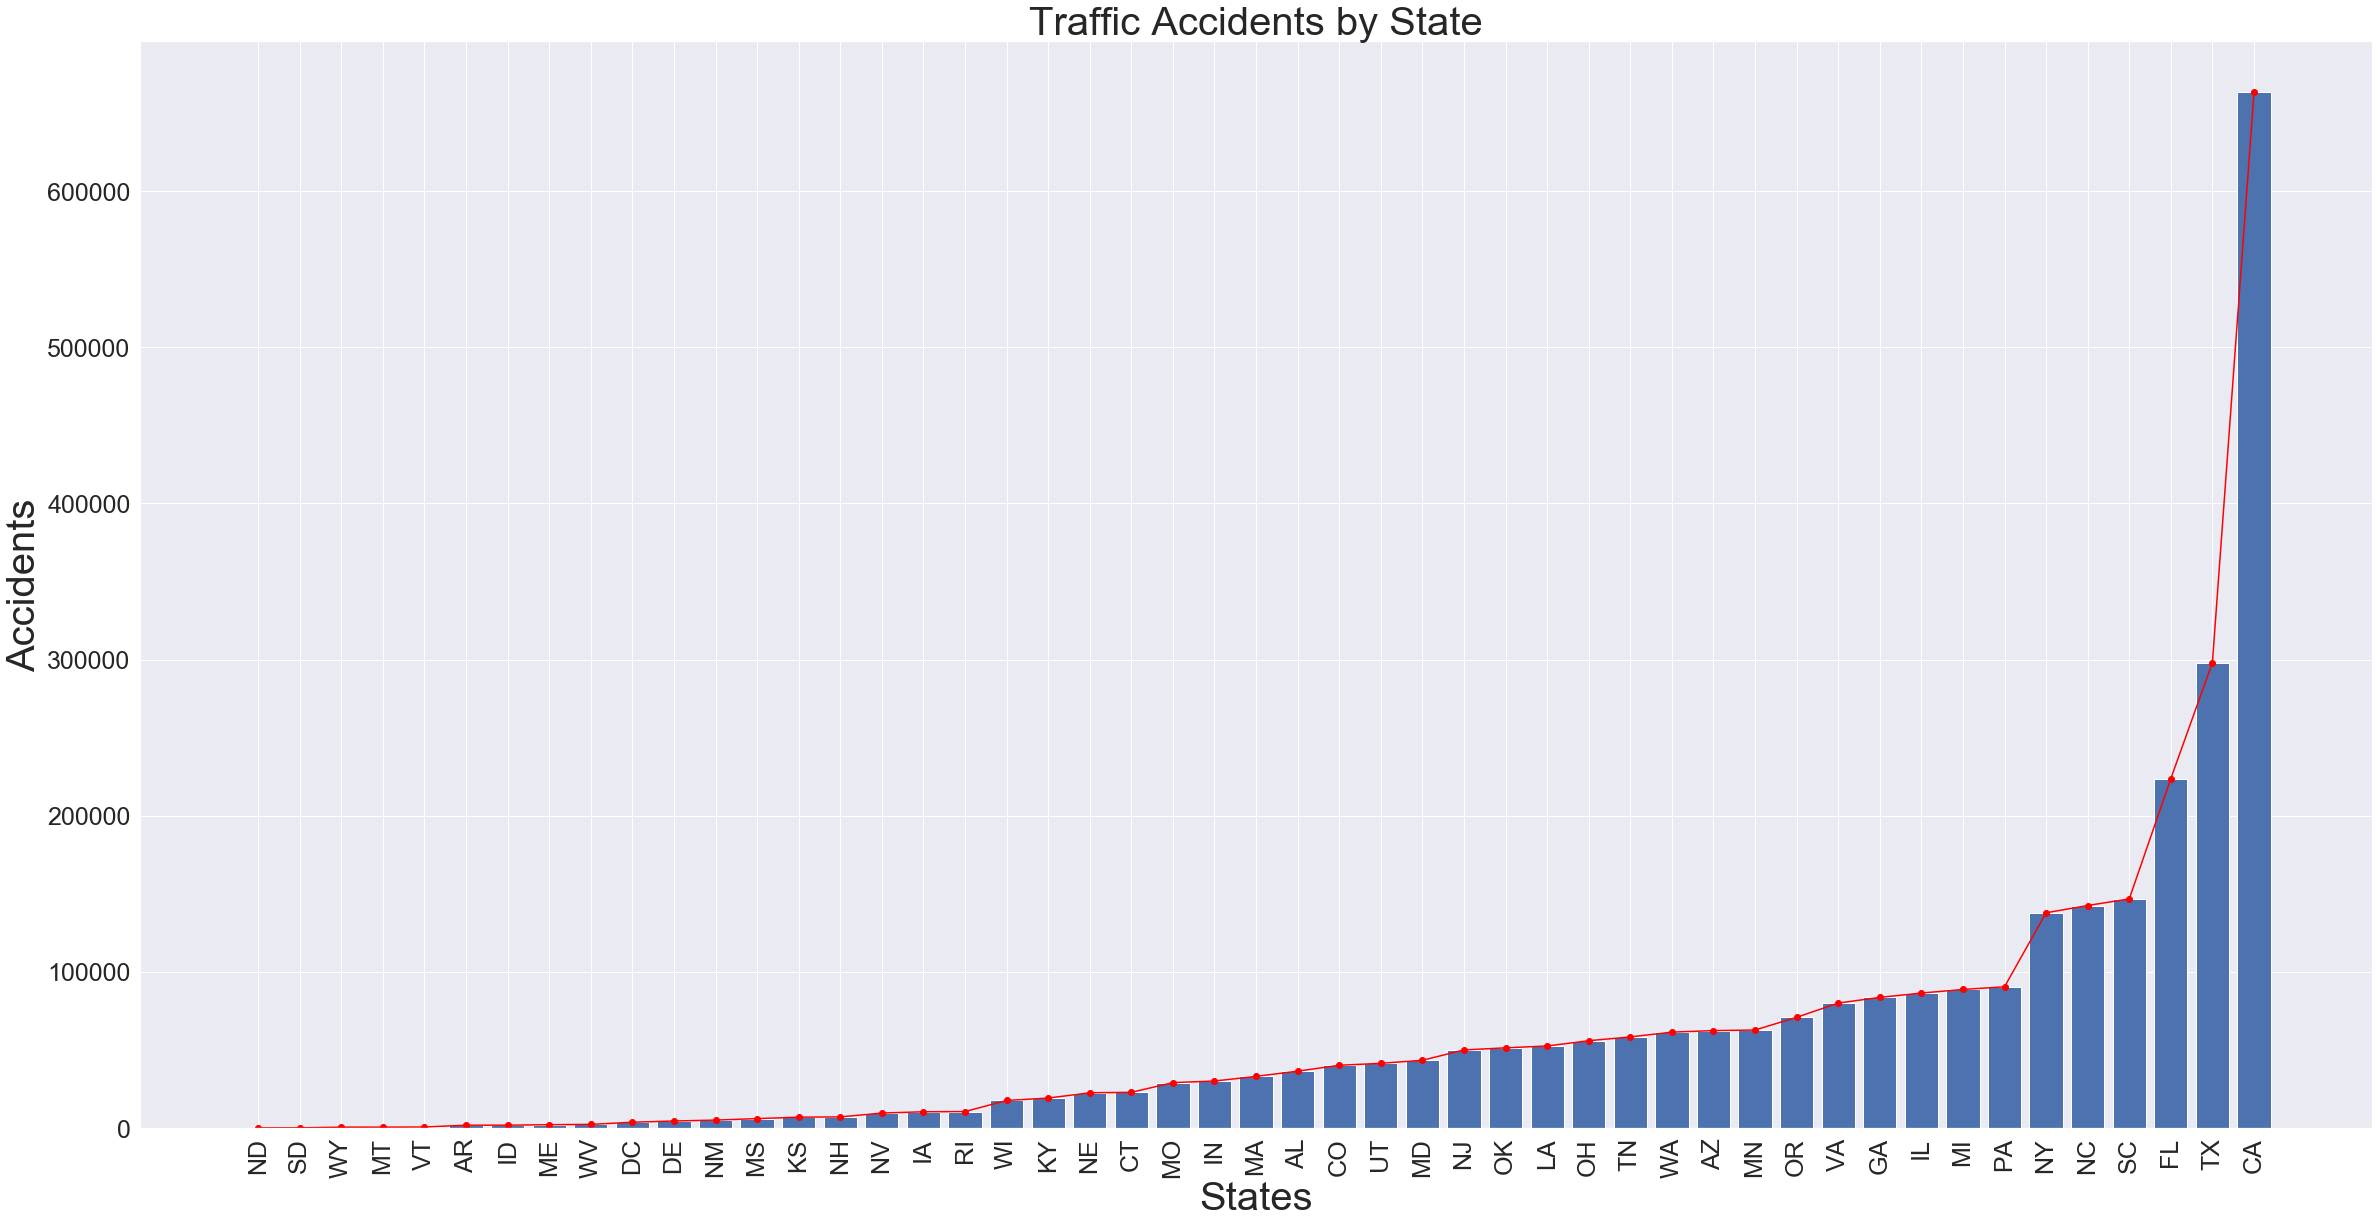

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(40,20))
plt.bar(datastate['State'], datastate['ID'])
plt.plot(datastate['State'], datastate['ID'], '-o', color='red')
plt.title('Traffic Accidents by State', fontsize=40)
plt.xlabel('States', fontsize=40)
plt.ylabel('Accidents', fontsize=40)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.show()

Looking at the bar chart and the geo-map above, it is clear that California has the most number of cases. However, Let's compare it with the population to understand if overall it's normal for California to have high cases or it's just due to its population.
<br>
<b>I decided to compare the top 5 states having the most number of cases.</b><br>

Note:- Different factors can be taken into account like the total number of driver licences issued per state to the number of cases in that state however I decided to take population into account. While the population is not the best factor it can give us an overall insight on the same. I plan on analyzing drivers license in my future analysis.



In [5]:
topfive=datastate[-5:]
topfive['State name']=['North Carolina','South Carolina','Florida','Texas','California']

data1 = pd.read_csv('table1-most-populous-states.csv')

new_header = data1.iloc[0] #grab the first row for the header
data1 = data1[1:] #take the data less the header row
data1.columns = new_header 

d=data1['Geographic Area'].isin(['North Carolina','South Carolina','Florida','Texas','California'])
b=data1[data1['Geographic Area'].isin(['North Carolina','South Carolina','Florida','Texas','California'])]


b['July 1, 2019'] = b['July 1, 2019'].str.replace(",","").astype(float)


data2 = pd.read_csv('table2-states-numeric-growth.csv')
new_header = data2.iloc[0] #grab the first row for the header
data2 = data2[1:] #take the data less the header row
data2.columns = new_header 



data2['July 1, 2019'] = data2['July 1, 2019'].str.replace(",","").astype(float)
combinednewdata=pd.concat([b, data2])
combined=topfive.merge(combinednewdata, left_on='State name', right_on='Geographic Area', how='inner')
new=combined.drop_duplicates(subset='State name', keep="last")
new['diff']=(new['ID'])/(new['July 1, 2019'])*100


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,column_widths=[0.2, 0.8],
    specs=[[{"type": "bar"},
           {"type": "choropleth"}]],
   
)

fig.add_trace(go.Bar(x=new["State name"], y=new["diff"]),
              row=1, col=1)



fig.add_trace(go.Choropleth(
    locations=new['State'],
    z=new['diff'].astype(float),
    locationmode='USA-states',
    
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Percentage"
),row=1,col=2)

fig.update_layout(
    title_text = 'Overall state percentage for Traffic accidents (Top 5)',
    geo_scope='usa', # limite map scope to USA
    height=500,
    width=800
)
fig.update_layout(showlegend=False)

fig.show("png")

/Users/akankshashetty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/akankshashetty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/akankshashetty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.


Surprisingly comparing the population we get to know that <b>South Carolina has many cases compared to its population</b>. Meaning that of the population is taken as a factor then the percentage of South Carolina being affected is way more than the other states. This makes us realize that <b>only taking the number of cases into account will not give the best interpretation. </b>The Map on the right tells us that the highest cases are occurring on the east coast, which is extremely interesting.




Not all accidents are severe right? <br>There is a level of Severity associated with each accident, let's explore this. Below there is an interactive plot which has a drop-down menu to select the latitude and longitude of the accidents. <br>
Heres an activity for you all:<b><br>
Step 1: adjust x to starting latitude and y to Starting longitude.<br>
Step 2: adjust x to Ending latitude and y to Ending longitude. 
</b><br>
What do you see?


In [6]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import matplotlib.colors as mpl_colors
datanew=data[['Start_Lat','Start_Lng','End_Lat','End_Lng','Severity']]
plt.clf()
@ipywidgets.interact(x = datanew.columns, y= datanew.columns, colormap = plt.colormaps(),sym_log = True) #interactivity
def plot(x = 'Start_Lat',y = 'Start_Lng', colormap = 'colormap',sym_log = True):
    plt.clf()
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
    fig, ax = plt.subplots(figsize=(20,10))    #figure size
    #Creating scatter plot
    CAX = ax.scatter(datanew[x],datanew[y], cmap=colormap, norm = norm, c=np.log10(datanew['Severity']))
    plt.colorbar(CAX, extend = 'both')
    plt.show()

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='x', options=('Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Seve…

It can be clearly seen that when we adjust the drop-down menu to the starting locations, most of the points on the map turn blue, orange and grey. These are between mid to high level of severity.

But when we adjust the drop-down to the ending locations, most points on the map turn green.

This implies that the <b>starting locations of the accidents so far have a higher level of severity.</b>


Exploring more on the severity, lets see which states are top 5 states for each level of severities.

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

severity4=data[data['Severity'] == 4]
severity4=severity4.groupby('State')['Severity'].count().reset_index().sort_values(by='Severity')
severity4=severity4[-5:]
sev4=severity4.State.to_list()
value4=severity4.Severity.to_list()


severity2=data[data['Severity'] == 2]
severity2=severity2.groupby('State')['Severity'].count().reset_index().sort_values(by='Severity')
severity2=severity2[-5:]
sev2=severity2.State.to_list()
value2=severity2.Severity.to_list()

severity1=data[data['Severity'] == 1]
severity1=severity1.groupby('State')['Severity'].count().reset_index().sort_values(by='Severity')
severity1=severity1[-5:]
sev1=severity1.State.to_list()
value1=severity1.Severity.to_list()


severity3=data[data['Severity'] == 3]
severity3=severity3.groupby('State')['Severity'].count().reset_index().sort_values(by='Severity')
severity3=severity3[-5:]
sev3=severity3.State.to_list()
value3=severity3.Severity.to_list()





# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[ {'type':'domain'}, {'type':'domain'}]],subplot_titles=("Severity 1", "Severity 2", "Severity 3", "Severity 4"))
fig.add_trace(go.Pie(labels=sev1, values=value1, name="Accidents"),
              1, 1)

fig.add_trace(go.Pie(labels=sev2, values=value2, name="Accidents"),
              1, 2)
fig.add_trace(go.Pie(labels=sev3, values=value3, name="Accidents"),
              2, 1)
fig.add_trace(go.Pie(labels=sev4, values=value4, name="Accidents"),
              2, 2)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")


fig.update_layout(height=800, width=800, title_text="Top 5 states per Severity")
fig.show("png")

It's not surprising that most of the states are the same throughout, but it was fascinating to see that Severity 4 has Florida with the most number of cases. This indicates that even though California has the most number of traffic accident cases, not all of them are from severity 4.
 
Another interesting thing is that Texas is not in the top 5 states with severity level 4. 

Quiet the opposite is Georgia since it's in the top states with severity level 3 and 4 but not 1 and 2. This indicates that most of Georgias cases are dangerous. Even Ohio for that case is one of the top states with severity level 4.

<h4>Does temperature have any effect on traffic accidents? </h4>

The below graph can be arranged into a 6-month span, 1 year and throughout the years span to get a better understanding. Hovering on the data points gives more details.
Just by looking at the graph and adjusting the parameters, are there any observations? Let's find out!

In [8]:

import pandas as pd

# Load data
np.random.seed(seed=42)
nsamples = 1000
downSampleMask = np.random.choice(range(len(data)-1), nsamples, replace=False)
dataDS = data.loc[downSampleMask]


# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(dataDS.End_Time), y=list(dataDS['Temperature(F)']),mode='markers',marker_color=dataDS['Temperature(F)'],marker=dict(
        size=6,
        color=np.random.randn(500), #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )))

# Set title
fig.update_layout(
    title_text="Temperature during Traffic Accidents"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show("png")

Most of the data point seen lie between <b>60 to 85</b>. Most of the low temperatures are from the month of January each year which makes sense since a lot of states experience heavy snowfall during the month of January. And the months June and July have high temperatures because of summer. But extreme high and low temperatures have scare points and most of the data points are between 60 to 85.

Another interesting observation is that the point gets denser over the years. In 2016 there are less scare points compared to 2019. Does this mean that the number of cases increases over time? Let's find out


In [9]:

#dataframe for month count
data['month'] = pd.DatetimeIndex(data['Start_Time']).month
month=data.groupby('month')['ID'].count().reset_index()

l=data['Severity'].unique() #list of unique severity values 
df1 = data[data['Severity'].isin([l[0]])] #Severity 3
df2 = data[data['Severity'].isin([l[1]])] #Severity 2
df3 = data[data['Severity'].isin([l[2]])] #Severity 1
df4 = data[data['Severity'].isin([l[3]])] #Severity 4
df1=df1.groupby('month')['ID'].count().reset_index()
df2=df2.groupby('month')['ID'].count().reset_index()
df3=df3.groupby('month')['ID'].count().reset_index()
df4=df4.groupby('month')['ID'].count().reset_index()

#dataframe for week count
data['week'] = pd.DatetimeIndex(data['Start_Time']).week
week=data.groupby('week')['ID'].count().reset_index() 


l=data['Severity'].unique() #list of unique severity values 
df11 = data[data['Severity'].isin([l[0]])] #Severity 3
df22 = data[data['Severity'].isin([l[1]])] #Severity 2
df33 = data[data['Severity'].isin([l[2]])] #Severity 1
df44 = data[data['Severity'].isin([l[3]])] #Severity 4
df11=df11.groupby('week')['ID'].count().reset_index()
df22=df22.groupby('week')['ID'].count().reset_index()
df33=df33.groupby('week')['ID'].count().reset_index()
df44=df44.groupby('week')['ID'].count().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2)

#subplot 1
ax1.set_title('Total accidents by the week based on Severity')
ax1.plot(df11["week"], df11["ID"],'-g',color='r',label=l[0])
ax1.plot(df22["week"], df22["ID"],'-g',color='m',label=l[1])
ax1.plot(df33["week"], df33["ID"],'-g',color='y',label=l[2])
ax1.plot(df44["week"], df44["ID"],'-g',color='k',label=l[3])
ax1.set(xlabel='Week Number', ylabel='Total accidents')
ax1.legend(['Severity 3','Severity 2','Severity 1','Severity 4'],loc='best')
fig.set_size_inches(18, 8)

#subplot 2
ax2.set_title('Total accidents by the month based on Severity')
ax2.plot(df1["month"], df1["ID"],'-g',color='r',label=l[0])
ax2.plot(df2["month"], df2["ID"],'-g',color='m',label=l[1])
ax2.plot(df3["month"], df3["ID"],'-g',color='y',label=l[2])
ax2.plot(df4["month"], df4["ID"],'-g',color='k',label=l[3])
ax2.set(xlabel='Month Number', ylabel='Total Accidents')

plt.legend(loc="upper left")
plt.legend(['Severity 3','Severity 2','Severity 1','Severity 4'], loc='upper left')
fig.set_size_inches(18, 8)
plt.show()

We can see that the <b>cases with level 2 severity are way higher than the other levels. </b><br>
Followed by severity 3.<br>
Severity 1 has the least number of cases. <br>
In the left plot, we can see an <b>increase in the number of cases with the increase in the number of weeks</b>, this is an interesting observation, this can be confirmed with the plot on the right. This shows that in the <b>start of the year there are fewer cases</b>, The number of cases in the months October, November and December are higher, this could possibly be because towards the end of the year, its the time for holidays and people tend to travel a lot in those months. However, it is surprising to see that the <b>month of October has the most number of cases </b>compared to November and December.


Let's assess the other factors like<b> Traffic signal, stop sign, turning loop and amenity. </b>
The dataset provides the values for each of the independent accidents.

The below graph describes all these factors.


/Users/akankshashetty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



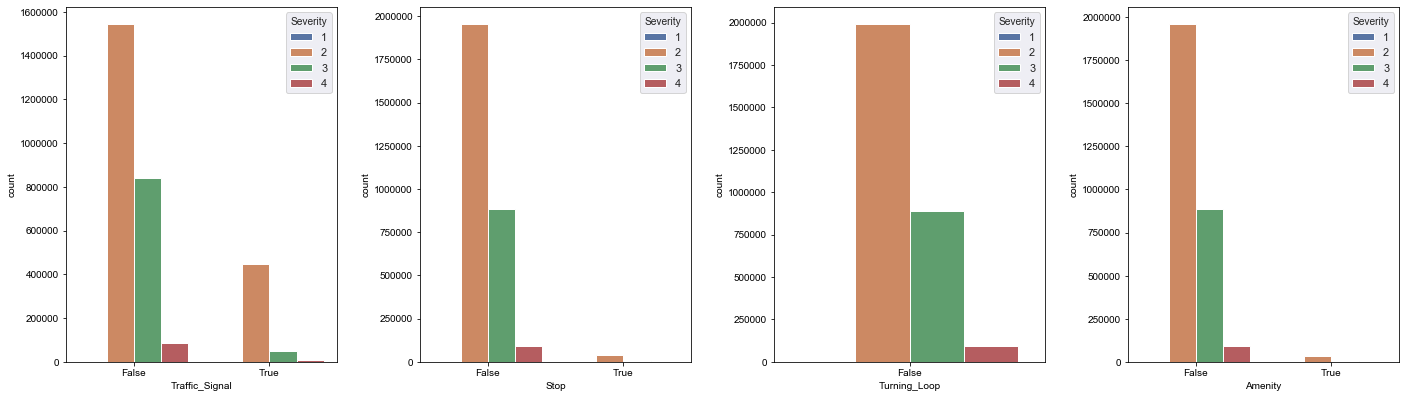

In [10]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (20, 6)
fig, ax =plt.subplots(1,4)

sns.set(style="darkgrid")
sns.countplot(x="Traffic_Signal", hue="Severity", data=data,ax=ax[0])
sns.countplot(x="Stop", hue="Severity", data=data,ax=ax[1])
sns.countplot(x="Turning_Loop", hue="Severity", data=data,ax=ax[2])
sns.countplot(x="Amenity", hue="Severity", data=data,ax=ax[3])
fig.tight_layout(pad=2.0)
fig.show()

<b>Traffic Signal :</b>

Most of the values are false and there are very few True values for each of the accidents.
The leading severity level is severity level 2 however it is biased due to most cases being at severity level 2.

<b>Stop sign:</b>

Almost all accidents did not have a stop sign. This means that the stop sign is not a huge factor affecting accidents.

<b>Turning Loop: </b>

This value too is indicative of the fact that turning loops do not affect the traffic accidents since all of them did not have a turning loop.

<b>Amenity:</b>

This isn't a very good sign since the heavy false value indicates that there were no amenities near the traffic accidents. Having amenities could really help the people affected by the accidents especially if they fall into the higher level severity bracket.

It is clear from the graph below that <b>Visibility is not one of the factors influencing traffic accidents</b>, As we can see that most accidents had the highest visibility(10). Whereas lower visibility values have lesser accidents. 

In [12]:
data['Visibility(mi)']=data['Visibility(mi)'].astype(str)
Visibility=data.groupby('Visibility(mi)').count().reset_index().sort_values(by='ID').dropna()[-11:]
Visibility=Visibility[pd.to_numeric(Visibility['Visibility(mi)'], errors='coerce').notnull()]

import plotly.express as px
fig = px.bar(Visibility, x='Visibility(mi)', y='ID',color='ID')
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
       
    )
)



fig.show("png")

<h4>References:</h4>
<br>
The data from this dataset were fetched from the below sources, while there was no need to plot a bar chart for it, I decided to do it anyway since we are working with visualizations.

In [13]:
import plotly.express as px
source=data.groupby('Source')['ID'].count().reset_index().sort_values(by='ID')
fig = px.bar(source, x='Source', y='ID',color='ID')
fig.show("png")

Other than this,
The data sets are available to us because of the following sources 
<br>
License of the dataset - Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0)
<br>
We can only use this data for non-commercial, research, or academic applications by citing the papers as follows:
<ul>
<li><h5>Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.</h5></li>

<li><h5>Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.</h5></li>

</ul>
The following datasets were also explored :

https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html <br>

https://worldpopulationreview.com/states/<br>

https://www.census.gov/newsroom/press-releases/2019/popest-nation.html<br>

https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population<br>

